# Alignment the slide scan images


All input are cropped and downscaled.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import napari
import os
import tifffile as tif
import scipy.ndimage as ndi
import skimage as ski

In [3]:
data_dir = '/mnt/central_nas/datasharing/Quentin/IMC_MALDI_gutenTAG/SlideScan/2609/temp/'
pano_dir = os.path.join(data_dir, 'pano_2609')
he_dir = os.path.join(data_dir, 'HE_2609')
matrix_dir = os.path.join(data_dir, 'affine_matrices_2609')
print(data_dir)

/mnt/central_nas/datasharing/Quentin/IMC_MALDI_gutenTAG/SlideScan/2609/temp/


In [4]:
# list files in directory
files = os.listdir(data_dir)
he_files = os.listdir(he_dir)
mt_files = os.listdir(matrix_dir)
mt_files

['Glass_S8_to_Ref_MCD_2609.txt',
 'MCD_to_Ref_Glass_S6_2609.txt',
 'ITO_MALDI_to_Ref_Craters_S3_2609.txt']

In [16]:
img_base_path = os.path.join(pano_dir, '2609_pano.tif')
img_input_path = os.path.join(he_dir, 'QH_glass_2609-S08.tif')

img_base = tif.imread(img_base_path)
img_input = tif.imread(img_input_path)

In [37]:
img_base = img_base[:,:,0]

In [28]:
img_input = img_input[:,:,0]

In [27]:
print(img_input.shape)
print(img_input.dtype)

# resize input image to match the 1um scale
scale = 0.33
img_input_scale = ski.transform.rescale(img_input[:,:,0], scale, anti_aliasing=True, preserve_range=True).astype(np.uint8)
print(img_input_scale.shape)
print(np.max(img_input_scale))

(28168, 24646, 3)
uint8
(9295, 8133)
255


In [42]:
# save the preprocessed, downsampled images 
tif.imwrite(os.path.join(pano_dir, '2609_pano_p.tif'), img_base)
tif.imwrite(os.path.join(he_dir, 'QH_glass_2609-S08_p.tif'), img_input_scale)

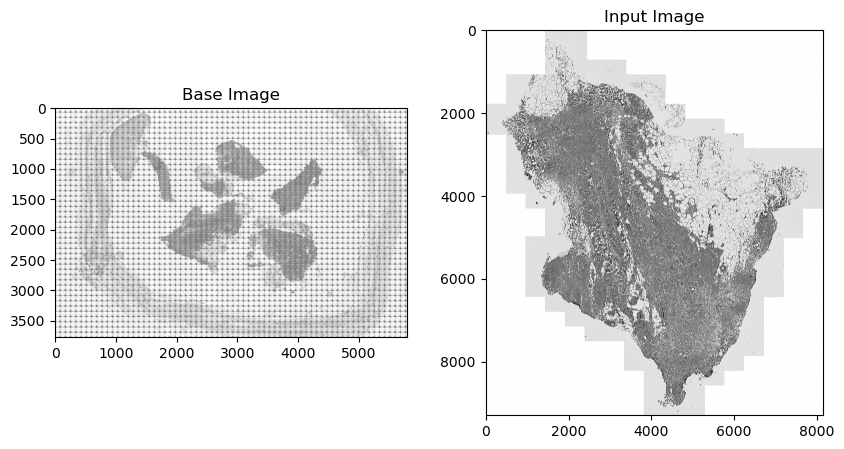

In [21]:
# plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_base, cmap='gray')
ax[0].set_title('Base Image')
ax[1].imshow(img_input_scale, cmap='gray')
ax[1].set_title('Input Image')
plt.show()

Read in transfrom matrix

In [31]:
trans_mat_path = os.path.join(matrix_dir, 'Glass_S8_to_Ref_MCD_2609.txt')
# read in as np array
trans_mat = np.loadtxt(trans_mat_path, np.float32, delimiter=',')

scale_affine = np.eye(3)
scale_affine[0, 0] = 1/scale
scale_affine[1, 1] = 1/scale

trans_mat_scale = trans_mat @ scale_affine

r_trans_mat = np.linalg.inv(trans_mat)
r_trans_mat_scale = np.linalg.inv(trans_mat_scale)

print(r_trans_mat)
print(r_trans_mat_scale)

[[ 3.3055758e-01 -4.4584432e+00  1.3768030e+05]
 [-4.5209160e+00 -1.6673435e-01  7.3670891e+04]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
[[ 1.09084000e-01 -1.47128629e+00  4.54344986e+04]
 [-1.49190234e+00 -5.50223377e-02  2.43113940e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [26]:
np.max(img_input_scale)

np.uint16(255)

In [38]:
# apply a affine transformation to the input image
test = ndi.affine_transform(img_base, trans_mat)

In [39]:
print(test.shape)
print(np.max(test))

(3775, 5800)
0
